In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.algorithms import approximation as nx_approx


# Adding path to module
sys.path.append("../")
# picture path
PICS = '../pics/'

# Module imports
from contagion import Contagion, config
from contagion.config import _baseconfig
from contagion.plotting import plot_infection_history

In [2]:
my_config = dict(_baseconfig)
my_config["general"]["random state seed"] = 3
my_config["population"]["population class"] = "NetworkXPopulation"
my_config["scenario"]["sim_length"] = 1000
my_config['infection']['infected'] = 10

my_config['infection']["hospitalization probability pdf"]['mean'] = 0.0001
my_config['infection']["hospitalization probability pdf"]['sd'] = 0.00001
my_config['infection']['will have symptoms prob pdf']['mean'] = 0.5
my_config['infection']['will have symptoms prob pdf']['sd'] = 0.1
my_config["population"]["random interactions pdf"]["mean"] = 20
my_config["population"]["random interactions pdf"]["sd"] = 5
my_config["population"]["random interactions intensity pdf"]["mean"] = 0.0001
my_config["population"]["random interactions intensity pdf"]["sd"] = 0.0001
my_config["population"]["population size"] = 10000
my_config["population"]["nx"] = {
            "func": "lfr_benchmark",
            "kwargs": {
                "tau1": 3.5,
                "tau2": 1.1,
                "mu": 0.1,
                "average_degree": 5,
                "min_community": 9,
                "max_iters": 1000,
            },
            "inter freq pdf": {
                "class": "Gamma",
                "mean": 7.8,
                "sd": 3
            },
            "intra freq pdf": {
                "class": "Gamma",
                "mean": 7.8,
                "sd": 3
            }

        }


In [3]:
contagion = Contagion(my_config)
g = contagion.pop._graph

contagion.sim()
stats = pd.DataFrame(contagion.statistics)

7.800532858572548


(0, 50)

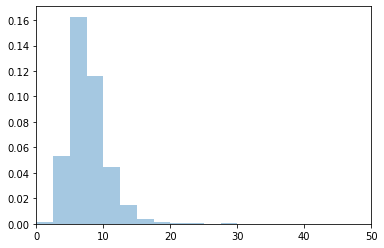

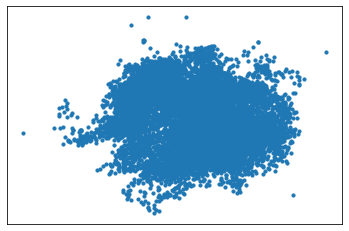

In [12]:
pos = nx.spring_layout(g, k=3/np.sqrt(g.number_of_nodes()))
nx.draw_networkx_nodes(g, pos, node_size=10)         

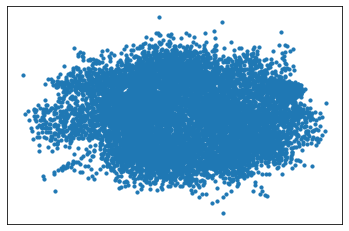

In [13]:
pos = nx.spring_layout(g, k=4/np.sqrt(g.number_of_nodes()))
nx.draw_networkx_nodes(g, pos, node_size=10)         

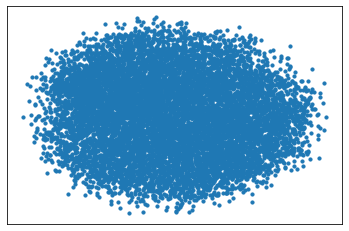

In [15]:
pos = nx.spring_layout(g, k=7/np.sqrt(g.number_of_nodes()))
nx.draw_networkx_nodes(g, pos, node_size=10)         

In [16]:
g.number_of_edges()

18634

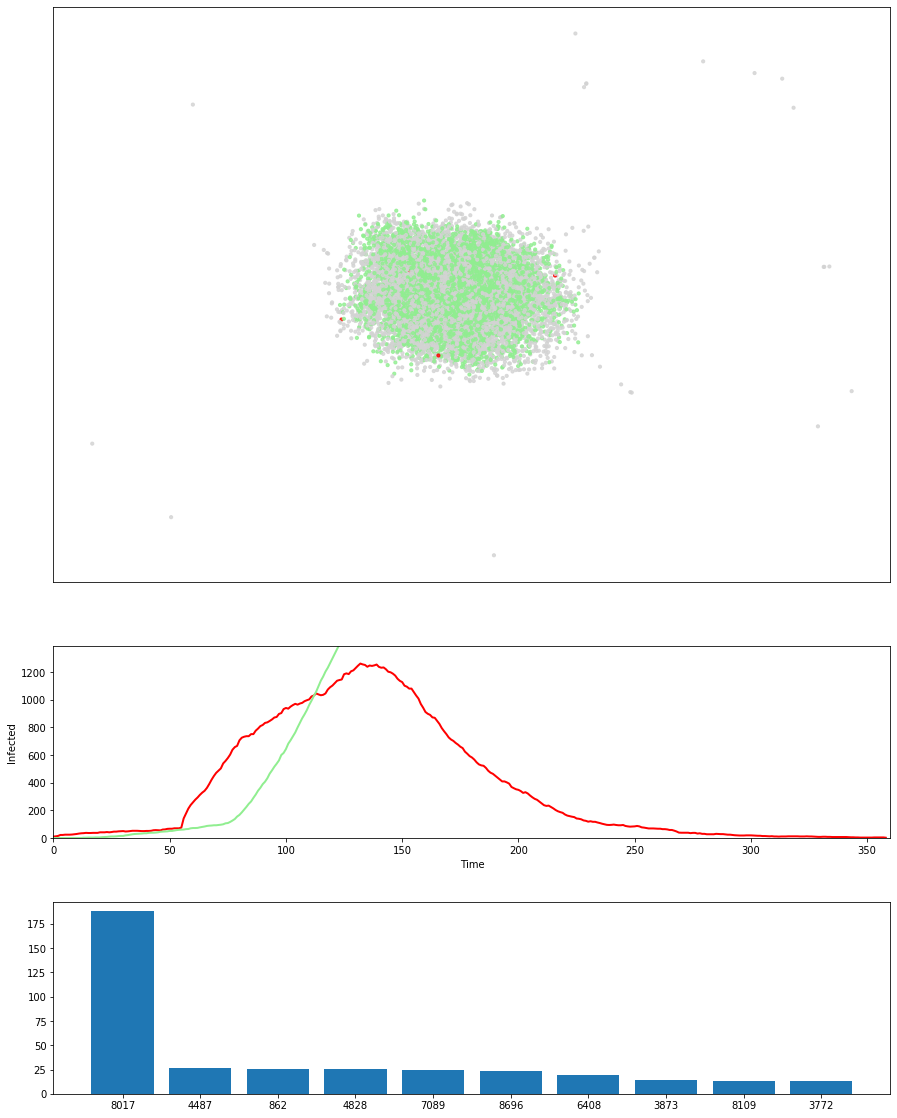

In [85]:
plot_infection_history(g, pos, stats, PICS+"lfr_graph_animation.mp4")

In [23]:
cc = nx.closeness_centrality(g)
avg_cc = np.average(np.ma.masked_invalid(list(cc.values())))

KeyboardInterrupt: 

In [25]:
avg_cc = np.ma.average(np.ma.masked_invalid(1/np.asarray(list(cc.values()))))

<ipython-input-25-722c731d7331>:1: RuntimeWarning: divide by zero encountered in true_divide
  avg_cc = np.ma.average(np.ma.masked_invalid(1/np.asarray(list(cc.values()))))


In [26]:
avg_cc

18.768128168802583

In [20]:
trans = nx.transitivity(g)
print(trans)

0.01104438346032133


In [43]:
g2 = nx.barabasi_albert_graph(10000, 3)

In [44]:
np.average(list(dict(nx.degree(g2)).values()))

5.9982

In [45]:
from networkx.generators.community import _powerlaw_sequence, _generate_communities

In [64]:
seed = np.random.RandomState(3)
deg_seq = list(dict(nx.degree(g2)).values())
min_community = 10
max_community = None
n = len(g2)

# Validate parameters for generating the community size sequence.
if min_community is None:
    min_community = min(deg_seq)
if max_community is None:
    max_community = max(deg_seq)

low, high = min_community, max_community

def condition(seq): return sum(seq) == n

def length(seq): return sum(seq) >= n
comms = _powerlaw_sequence(1.1, low, high, condition,
                           length, 100, seed)

communities = _generate_communities(deg_seq, comms, 0.1, 10*len(g2), seed)

In [65]:
mu = 0.1
G = nx.Graph()
G.add_nodes_from(range(n))
for c in communities:
    for u in c:
        while G.degree(u) < round(deg_seq[u] * (1 - mu)):
            v = seed.choice(list(c))
            G.add_edge(u, v)
        while G.degree(u) < deg_seq[u]:
            v = seed.choice(range(n))
            if v not in c:
                G.add_edge(u, v)
        G.nodes[u]['community'] = c

In [67]:
trans = nx.transitivity(g2)
print(trans)

0.0028738617693620273


In [68]:
cc = nx.closeness_centrality(g2)
avg_cc = np.average(list(cc.values()))

In [69]:
print(avg_cc)

0.23664999407644577


In [5]:
for graph in graphs:
    rate_per_node = []
    for node in graph:
        rate_per_node.append(sum([val["weight"] for _, val in dict(graph[node]).items()]))

    print(np.average(rate_per_node))
    
    

7.79366124878986
7.766905359427606
7.77088316086056
7.807263583251534
7.768001845983217
7.766662372460436
7.812361507011695
7.769687357337053
7.818780002610234
7.756197821156991
7.768556389091775
7.779970379257147
7.78303008303016
7.738745308537813
7.754049549432795


Text(0, 0.5, 'Infected')

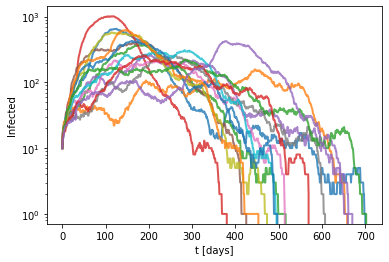

In [6]:
fig, ax = plt.subplots()
for res in results:
    ax.plot(np.arange(len(res['is_infected'])), res['is_infected'],
            lw=2, alpha=0.8)
ax.set_yscale("log")
ax.set_xlabel("t [days]")
ax.set_ylabel("Infected")

In [7]:
for i, res in enumerate(results):
    print(i, max(res["is_infected"]))

0 653
1 158
2 373
3 1012
4 265
5 413
6 216
7 259
8 576
9 309
10 423
11 624
12 223
13 260
14 423


In [ ]:
nx.spring_layout(graphs[])